In [92]:
#importamos librerias de trabajo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#cargamos la data csv obtenico de kaggle
data = pd.read_csv('Habitos_Estudio.csv')

In [11]:
# describicion de la informacion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [97]:
# separar la variable a predecir del resto de variables predictoras
y = data.iloc[:,-1:].values
x = data.iloc[:,1:-1].values

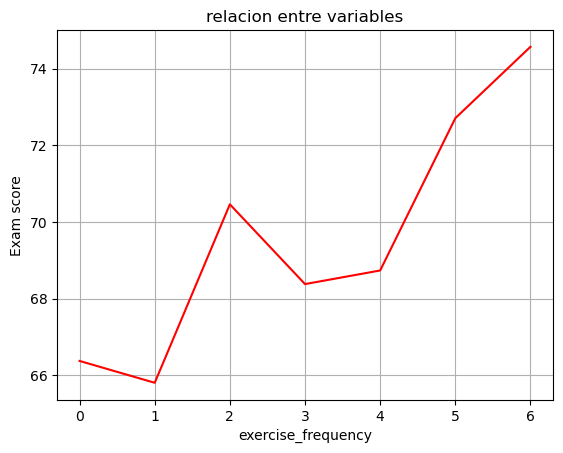

In [91]:
#mostrar la relacion entre las variables
# para ello conseguimos el promedio de los resultados por cada valor unico de nuestro predictor y mostramos la relacion.
hours = (data.iloc[:,10:11].values)
promedios_a = data.groupby('exercise_frequency')['exam_score'].mean()
promedios_mean = promedios_a.values
variable_predictora = np.unique(hours)
plt.plot(variable_predictora,promedios_mean,"red")
plt.title("relacion entre variables")
plt.ylabel("Exam score")
plt.xlabel("exercise_frequency")
plt.grid("True")


In [99]:
#lidiamos con las variables categoricas 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,5,8,10,11,13])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

[[1.0 0.0 0.0 ... 8.0 6 8]
 [1.0 0.0 1.0 ... 4.6 6 8]
 [0.0 1.0 1.0 ... 8.0 1 1]
 ...
 [0.0 1.0 1.0 ... 6.5 5 9]
 [0.0 1.0 0.0 ... 7.6 0 1]
 [1.0 0.0 1.0 ... 7.1 2 8]]


In [102]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
# Usamos 90% para entrenamiento y 10% para prueba con random state 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=3)
"""considero que no es necesario hacer un escalado de variables ya que la unica variable que tiene un valor mas de 10 
es el porcentaje de asistencia y en la valuacion  preliminar no parecia un cantidato fuerte en cuanto a poder predictivo"""


In [104]:
# Entrenamiento del modelo de regresión lineal múltiple
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
# Mostramos las predicciones junto con los valores reales para comparación.
resultados = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
print("Predicciones vs Valores Reales:\n", resultados)

Predicciones vs Valores Reales:
 [[ 55.79  50.4 ]
 [ 51.97  51.8 ]
 [ 73.01  71.8 ]
 [ 66.7   61.6 ]
 [ 91.45  83.5 ]
 [111.23 100.  ]
 [ 98.2  100.  ]
 [ 57.06  59.3 ]
 [ 48.34  49.9 ]
 [ 64.04  71.7 ]
 [ 88.99  87.1 ]
 [ 68.14  68.7 ]
 [ 49.94  45.5 ]
 [ 80.5   80.9 ]
 [ 73.27  69.2 ]
 [ 75.25  74.  ]
 [ 69.25  71.3 ]
 [ 77.75  89.5 ]
 [102.87 100.  ]
 [ 49.32  46.4 ]
 [ 51.89  51.  ]
 [ 46.19  48.7 ]
 [ 49.78  37.4 ]
 [ 95.2   93.1 ]
 [ 74.15  77.6 ]
 [ 71.14  71.6 ]
 [ 51.87  47.2 ]
 [ 67.95  59.5 ]
 [ 67.88  65.5 ]
 [ 78.67  77.2 ]
 [ 52.68  54.2 ]
 [ 84.71  88.  ]
 [ 80.56  74.9 ]
 [ 67.16  74.8 ]
 [ 78.87  82.9 ]
 [ 83.63  85.  ]
 [104.27 100.  ]
 [ 56.29  70.3 ]
 [ 89.78  98.7 ]
 [ 41.    43.7 ]
 [ 74.69  83.6 ]
 [ 51.5   53.5 ]
 [ 82.16  84.5 ]
 [ 84.54  96.4 ]
 [ 96.1   90.  ]
 [ 78.57  70.  ]
 [ 73.78  77.  ]
 [ 30.34  26.7 ]
 [ 63.31  63.2 ]
 [ 87.98  90.2 ]
 [ 99.77 100.  ]
 [ 68.9   73.5 ]
 [ 65.06  71.8 ]
 [ 69.42  76.4 ]
 [ 99.01 100.  ]
 [ 72.77  78.5 ]
 [ 59.86  55.  

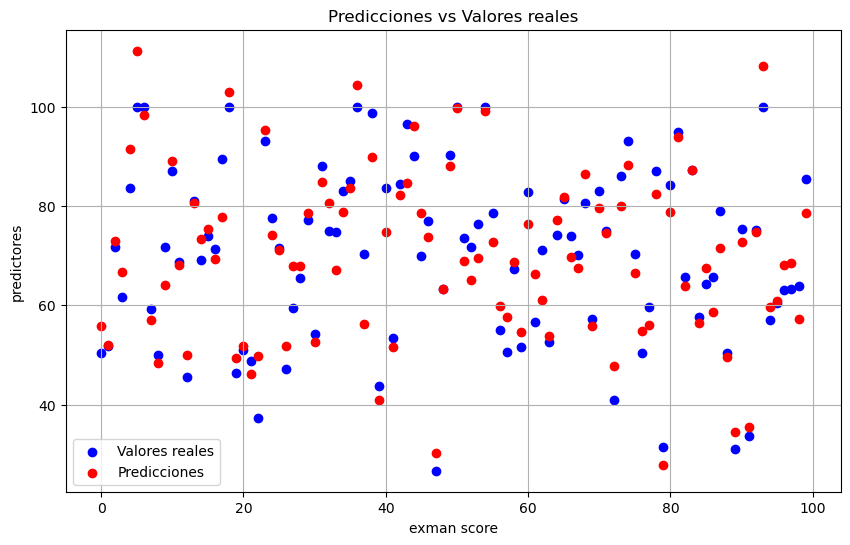

In [105]:
# Interpretación y visualización
# graficamos contra los valores reales para evaluar visualmente el desempeño del modelo.
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores reales')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicciones')
plt.title('Predicciones vs Valores reales')
plt.xlabel('exman score')
plt.ylabel('predictores')
plt.legend()
plt.grid()
plt.show()